# Human Speech Emotion Classification

### Action Items:


<font color='yellow'>19/04 - 21/04</font>

1) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Share Data - Organize and share cleaned data with Izhar and Netanel by compressing it into a ZIP file and placing it under the "data" folder within the project directory. Ensure to update the project's ignore file to include this data path. 
    </label><br>
    
2) Target definition:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Define our primary objective or target score based on our specific use case and objectives. 
    </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Work on refining scoring methods. 
    </label><br>
    
3) Integration and Refactoring - Merge our codebases into a unified project for seamless collaboration:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Refine the correlation heatmap to display correlations between different features, aiming to identify redundant features, reduce runtime, and enhance efficiency.</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='green'>Netanel</font> Revamp the feature importance plot according to Netanel's implementation, ensuring visual clarity with colors, titles, and labels.</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='green'>Netanel</font> Adjust the label histogram orientation to vertical and integrate it into our workflow to visualize the data before and after splitting. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>(Victor)</font> Convert Victor's feature data from Numpy objects to Pandas for seamless integration and utilize the opportunity to familiarize ourselves with Pandas functionality. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Refactor lengthy functions into smaller, more manageable ones to enhance code readability and project structure.</label><br>
    
4) Feature Engineering methods - Work on refining features, dimensionality reduction techniques, and feature selection strategies:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Develop a function to filter out less important features, determining a suitable threshold collaboratively. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='red'>(???)</font> Utilize efficient methods such as scatter transform. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Lasso for feature selection without resorting to loops. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='red'>(???)</font> Apply PCA for dimensionality reduction, setting 'explained_variance_ratio' to retain 95% of the feature efficiency while reducing the feature count. </label><br>
    
5) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font> MiniRocket - Finilyze this method and get its best contribution for feature extraction. </label><br>

<font color='yellow'>22/04 - 30/04   (Some of us will not be available part of these days due to Passover holiday)</font>

6)  <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> GridSearch - Determine the hyperparameters to optimize and prepare for grid search using sklearn. Employ 'n_jobs' to expedite the parameter tuning process. </label><br> 


<font color='yellow'>01/05 - 04/05</font>

7) Presentation:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Collaboratively select a presentation template and distribute responsibilities for slide creation (10-15 slides total).</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Edit the presentation content, ensuring each slide clearly communicates its intended message with relevant plots, formulas, and explanations. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Dedicate time to presentation editing and rehearsal.</label><br>

In [48]:
# Install Packages
!pip install librosa --upgrade --quiet
!pip install noisereduce --upgrade --quiet

In [49]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
import opendatasets as od
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn as sns
import noisereduce as nr
from IPython.display import Audio
import librosa
import librosa.display
import wave

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import prjLib as lib

import warnings
warnings.filterwarnings ('ignore')

In [50]:
# Parameters

FRAME_LEN = 4096
HOP_LEN = 2048
N_MFCC = 14

ravdess = ['RAVDESS','data/ravdess-emotional-speech-audio']
tess = ['TESS','data/toronto-emotional-speech-set-tess']
cremad = ['CREMA-D','data/cremad/AudioWAV']
savee = ['SAVEE','data/savee-database/AudioData']
data_paths = [ravdess,tess,cremad,savee]

## Preprocessing and Feature Extraction

In [51]:
def ExtractLabel(audio_file_path,dataset_name):
    emotion = -1
    gender = 0
    if (dataset_name == 'RAVDESS'):
        emotion = int(audio_file_path[7:8]) - 1
        gender = int(audio_file_path[18:20]) & 0x1
    if (dataset_name == 'TESS'):
        if '_neutral' in audio_file_path:
            emotion = 0
        if '_happy' in audio_file_path:
            emotion = 2
        if '_sad' in audio_file_path:
            emotion = 3
        if '_angry' in audio_file_path:
            emotion = 4
        if '_fear' in audio_file_path:
            emotion = 5
        if '_disgust' in audio_file_path:
            emotion = 6
        if '_ps' in audio_file_path:
            emotion = 7
        if 'OAF_' in audio_file_path:
            gender = 1
        if 'YAF_' in audio_file_path:
            gender = 0
    if (dataset_name == 'CREMA-D'):
        if '_NEU_' in audio_file_path:
            emotion = 0
        if '_HAP_' in audio_file_path:
            emotion = 2
        if '_SAD_' in audio_file_path:
            emotion = 3
        if '_ANG_' in audio_file_path:
            emotion = 4
        if '_FEA_' in audio_file_path:
            emotion = 5
        if '_DIS_' in audio_file_path:
            emotion = 6
        speaker_id = int(audio_file_path[0:4])
        # df = pd.read_csv('data/cremad/VideoDemographics.csv')
        # df = df.loc[df['ActorID'] == speaker_id]
        # gender = int(df['Sex'] == 'Male')
    if (dataset_name == 'SAVEE'):
        if 'n' in audio_file_path:
            emotion = 0
        if 'h' in audio_file_path:
            emotion = 2
        if 'sa' in audio_file_path:
            emotion = 3
        if 'a' in audio_file_path:
            emotion = 4
        if 'f' in audio_file_path:
            emotion = 5
        if 'd' in audio_file_path:
            emotion = 6
        if 'su' in audio_file_path:
            emotion = 7
        gender = 1
    return emotion # np.concatenate(np.array([emotion,gender]).reshape(1,2),axis=0)

In [52]:
def ExtractFeatures(sample,sr,frame_len,hop_len,n_mfcc):
    mfcc = librosa.feature.mfcc(y=sample, sr=sr , n_mfcc=n_mfcc, n_fft=frame_len, win_length=frame_len, hop_length=hop_len)
    mfcc_mean = np.mean(mfcc,axis=1).reshape(mfcc.shape[0],1)
    # features = np.concatenate(( mfcc_mean[:,0], mfcc_median[:,0] ),axis=0)[:,0]
    return mfcc_mean[:,0] # features

In [53]:
def Preprocessing(frame_len,hop_len,n_mfcc):
    # Collect Data and Extract Features from audio files
    featured_data = []  # stores the features
    labels = []  # stores the labels
    for data_path in tqdm(data_paths,desc="Collecting Datasets"):
        root_dir = data_path[1]
        cpt = sum([len(d) for r, d, files in os.walk(root_dir)])+1
        for subdirs, dirs, files in tqdm(os.walk(root_dir), total=cpt, desc=f'Processing {data_path[0]} audio files', unit="file"):
            for file in files:
                if not '.wav' in file:
                    continue
                audio_file_path = os.path.join(subdirs, file)
                sample, sr = librosa.load(audio_file_path)
                # sample = nr.reduce_noise(y=sample, sr=sr)
                #if not np.isfinite(sample).all():
                #    continue
                # sample = FixSamples(sample,sr,4)
                features = ExtractFeatures(sample,sr,frame_len,hop_len,n_mfcc)
                label = ExtractLabel(file,data_path[0])
                featured_data.append(features)
                labels.append(label)
    featured_data = np.asarray(featured_data)
    labels = np.array(labels) 
    labels = labels.reshape(labels.shape[0],1)
    print(f'Data with total {featured_data.shape[0]} samples collected with {featured_data.shape[1]} features.')
    f_featured_data = lib.Numpy2Pandas(featured_data)
    f_labels = pd.DataFrame(labels, columns=['Emotion'])
    return f_featured_data, f_labels

In [54]:
def SplitData(featured_data,labels,trainRatio,plot):
    # Data samples split
    train_data, test_data, train_labels, test_labels = train_test_split(featured_data, labels, train_size = trainRatio, random_state = 512)

    if plot:
        lib.PlotSplitedDataHistogram(train_labels, test_labels)

    '''
    # Data extrapulation of train data, for uniform histogram of classes
    dataL1 = train_data[(train_labels==1)]
    L1 = train_labels[(train_labels==1)]
    dataL7 = train_data[(train_labels==7)]
    L7 = train_labels[(train_labels==7)]
    train_data = np.concatenate((train_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    train_labels = np.concatenate((train_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Train Data extrapulated with total {train_data.shape[0]} samples collected with {train_data.shape[1]} features.')

    # Data extrapulation of test data, for uniform histogram of classes
    dataL1 = test_data[(test_labels==1)]
    L1 = test_labels[(test_labels==1)]
    dataL7 = test_data[(test_labels==7)]
    L7 = test_labels[(test_labels==7)]
    test_data = np.concatenate((test_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    test_labels = np.concatenate((test_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Test Data extrapulated with total {test_data.shape[0]} samples collected with {test_data.shape[1]} features.')

    if plot:
        lib.PlotSplitedDataHistogram(train_labels, test_labels)
    '''
    
    return train_data,train_labels,test_data,test_labels

In [55]:
def TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators,min_samples_split,random_state, plot=True):
    if plot:
        corr_mat = lib.PlotCorrMap(train_data) # lib.PlotCorrMap(train_data) # train_labels
        corr_vec = lib.GetFeaturesCorr(corr_mat)
        #lib.PlotPairAllFeature(train_data,train_labels,train_data.shape[1])
    report, score, model = lib.TestClassificationModel(train_data,train_labels,test_data,test_labels,3, paramC=1,kernelType='rbf',n_estimators=n_estimators,min_samples_split=min_samples_split,random_state=random_state, plot=plot)
    feature_importance = []
    if plot:
        feature_importance = lib.FeaturesImportance(model,train_data)
    return report, score, corr_vec, feature_importance

Processing RAVDESS audio files:   0%|          | 0/25 [00:00<?, ?file/s]

Processing TESS audio files:   0%|          | 0/16 [00:00<?, ?file/s]

Processing CREMA-D audio files:   0%|          | 0/1 [00:00<?, ?file/s]

Processing SAVEE audio files:   0%|          | 0/5 [00:00<?, ?file/s]

Data with total 12162 samples collected with 14 features.


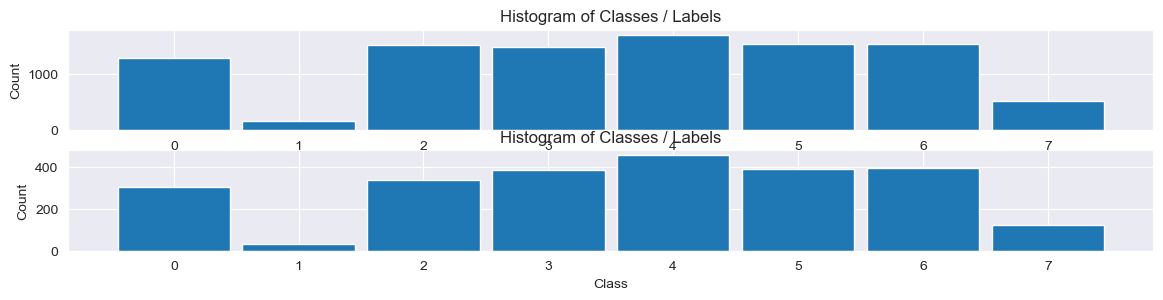

In [56]:
featured_data,labels = Preprocessing(FRAME_LEN,HOP_LEN,N_MFCC)
train_data,train_labels,test_data,test_labels = SplitData(featured_data,labels,trainRatio=0.8,plot=True)

Prediction Train Accuracy: 99.66 %
Prediction Test Accuracy: 57.25 %
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       304
           1       0.47      0.82      0.59        33
           2       0.48      0.51      0.49       338
           3       0.57      0.65      0.61       388
           4       0.69      0.79      0.73       458
           5       0.53      0.39      0.45       393
           6       0.54      0.43      0.48       394
           7       0.82      0.70      0.75       125

    accuracy                           0.57      2433
   macro avg       0.57      0.61      0.58      2433
weighted avg       0.57      0.57      0.57      2433



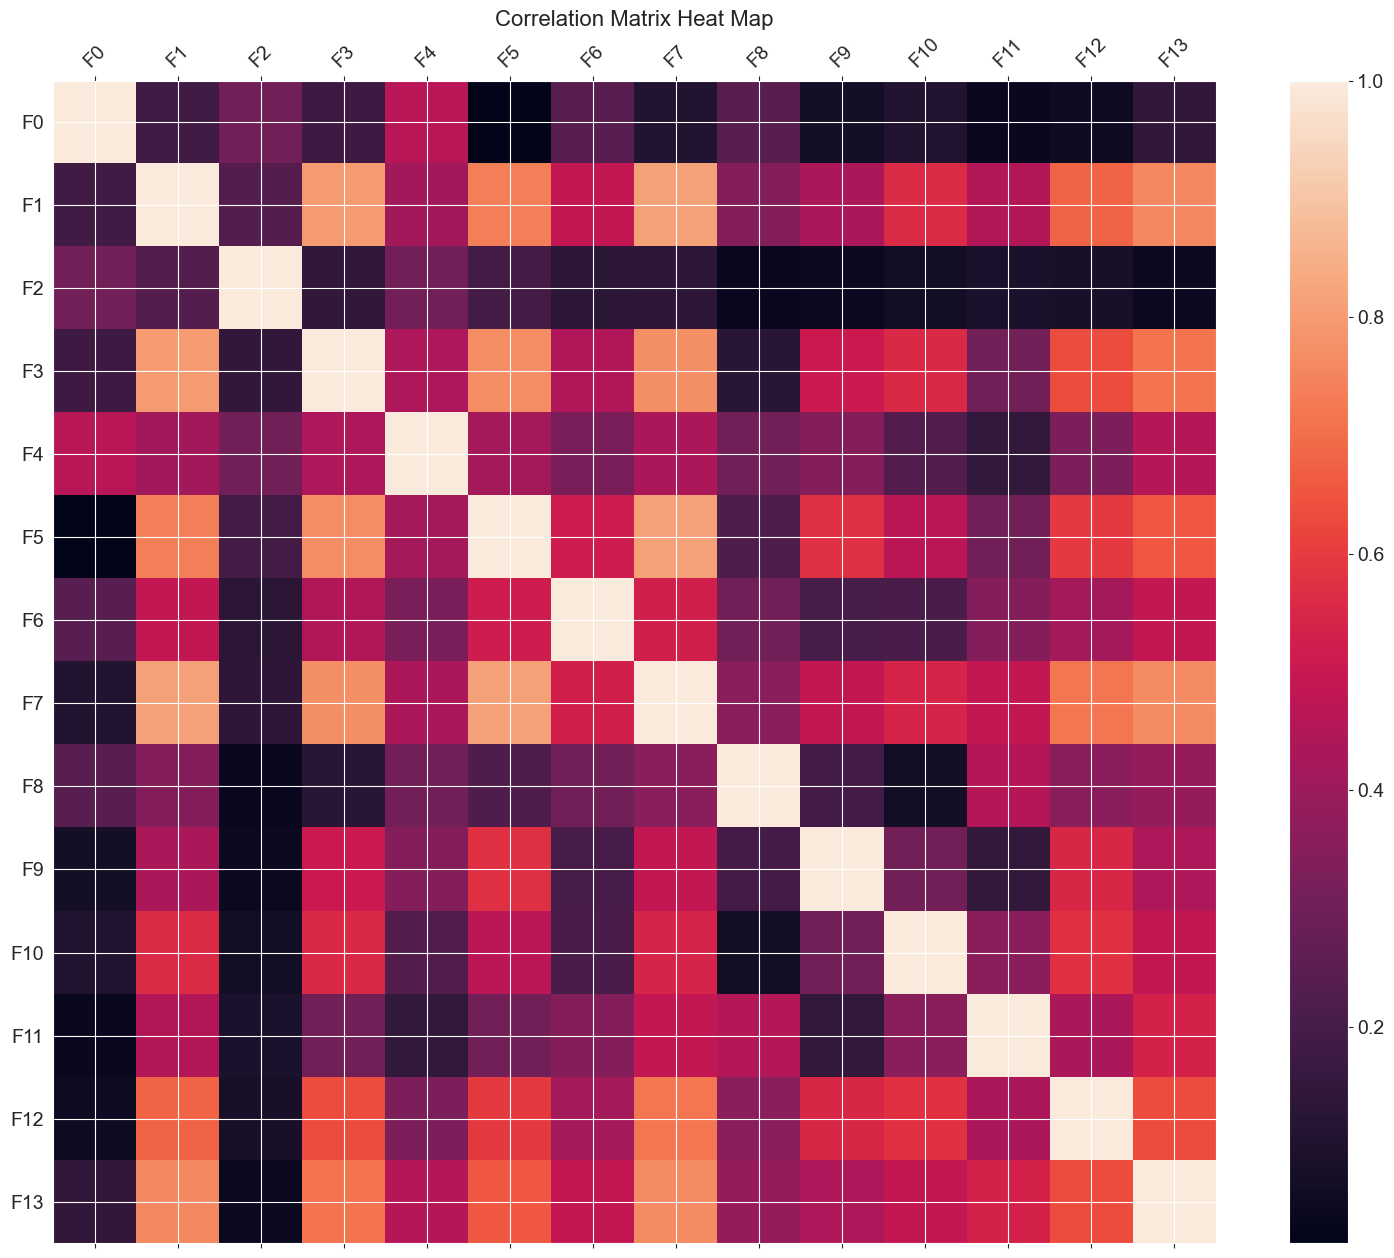

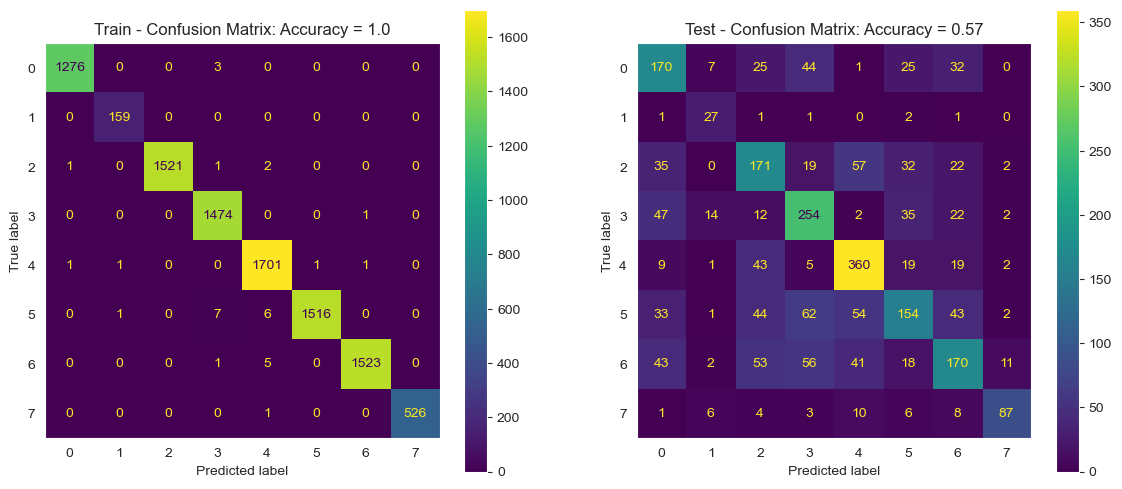

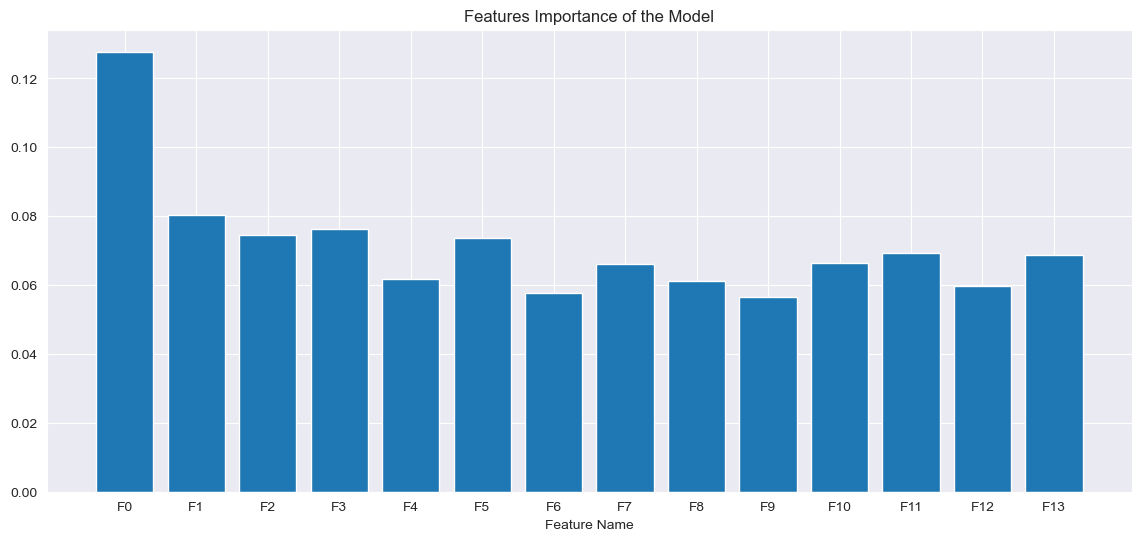

In [57]:
# Test ALL features with a model
report, score, corr_vec, feature_importance = TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=True)

In [58]:
def ExtractUnImportantFeatures(feature_importance,feature_importance_ratio_threshold):
    feature_importance_threshold = np.max(feature_importance) * feature_importance_ratio_threshold
    weak_features_indexes = np.where(feature_importance < feature_importance_threshold)[0]
    train_data = np.delete(train_data,weak_features_indexes,axis=1)
    test_data = np.delete(test_data,weak_features_indexes,axis=1)
    return train_data, test_data

In [59]:
def SelectFeatures(train_data,test_data,remove_features):
    train_data = train_data.drop(columns=remove_features)
    test_data = test_data.drop(columns=remove_features)
    '''
    # Select features
    delete_features_indexes = np.concatenate((np.arange(0,76),np.arange(146,241)),axis=0)
    train_data = np.delete(train_data,delete_features_indexes,axis=1)
    test_data = np.delete(test_data,delete_features_indexes,axis=1)
    print(f'Selected {train_data.shape[1]} features.')
    ''';
    return train_data, test_data

In [61]:
corr_thr = 0.5
feat_imp_ratio_thr = 0.2

corr_features = lib.ExtractCorrFeatures(corr_vec,corr_thr)
#ExtractUnImportantFeatures(feature_importance,feat_imp_ratio_thr)
remove_features = corr_features #[corr_features, ]
train_data_selected_features,test_data_selected_features = SelectFeatures(train_data,test_data,remove_features)
display(train_data_selected_features)

,F0,F2,F4,F6,F8,F9,F10,F11
10382,-285.285645,-16.543827,-27.950891,-23.246922,-14.976941,1.985579,6.761418,0.167865
1478,-293.292114,-1.038359,-24.775490,-18.401432,-14.746309,-1.770433,-13.229950,1.607224
820,-364.347748,-37.160301,-17.035879,-7.355330,-5.800355,-2.466752,-2.988663,13.611662
5174,-354.429596,4.996594,-16.660252,-8.403833,-16.236652,3.125285,0.294085,-2.179473
10985,-413.938873,3.283391,-27.036728,-19.952524,-11.359141,3.222290,-0.715137,-1.793164
...,...,...,...,...,...,...,...,...
11736,-156.062469,-14.470708,-12.672039,-26.349960,-8.646484,-12.662316,1.919295,-4.406510
1181,-232.340866,-44.412045,-24.415361,-11.197783,-5.976983,3.022697,-8.858768,8.709539
3309,-220.067932,-11.457032,-9.655351,-8.306519,-6.291684,9.253564,-18.592497,6.994550
8552,-284.719940,-5.046165,-10.106569,-23.217527,-3.081658,-1.102173,-3.368490,-5.354664


Prediction Train Accuracy: 99.27 %
Prediction Test Accuracy: 52.12 %
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       304
           1       0.51      0.79      0.62        33
           2       0.43      0.43      0.43       338
           3       0.53      0.61      0.56       388
           4       0.62      0.77      0.69       458
           5       0.48      0.34      0.40       393
           6       0.49      0.41      0.45       394
           7       0.64      0.54      0.59       125

    accuracy                           0.52      2433
   macro avg       0.52      0.55      0.53      2433
weighted avg       0.52      0.52      0.51      2433



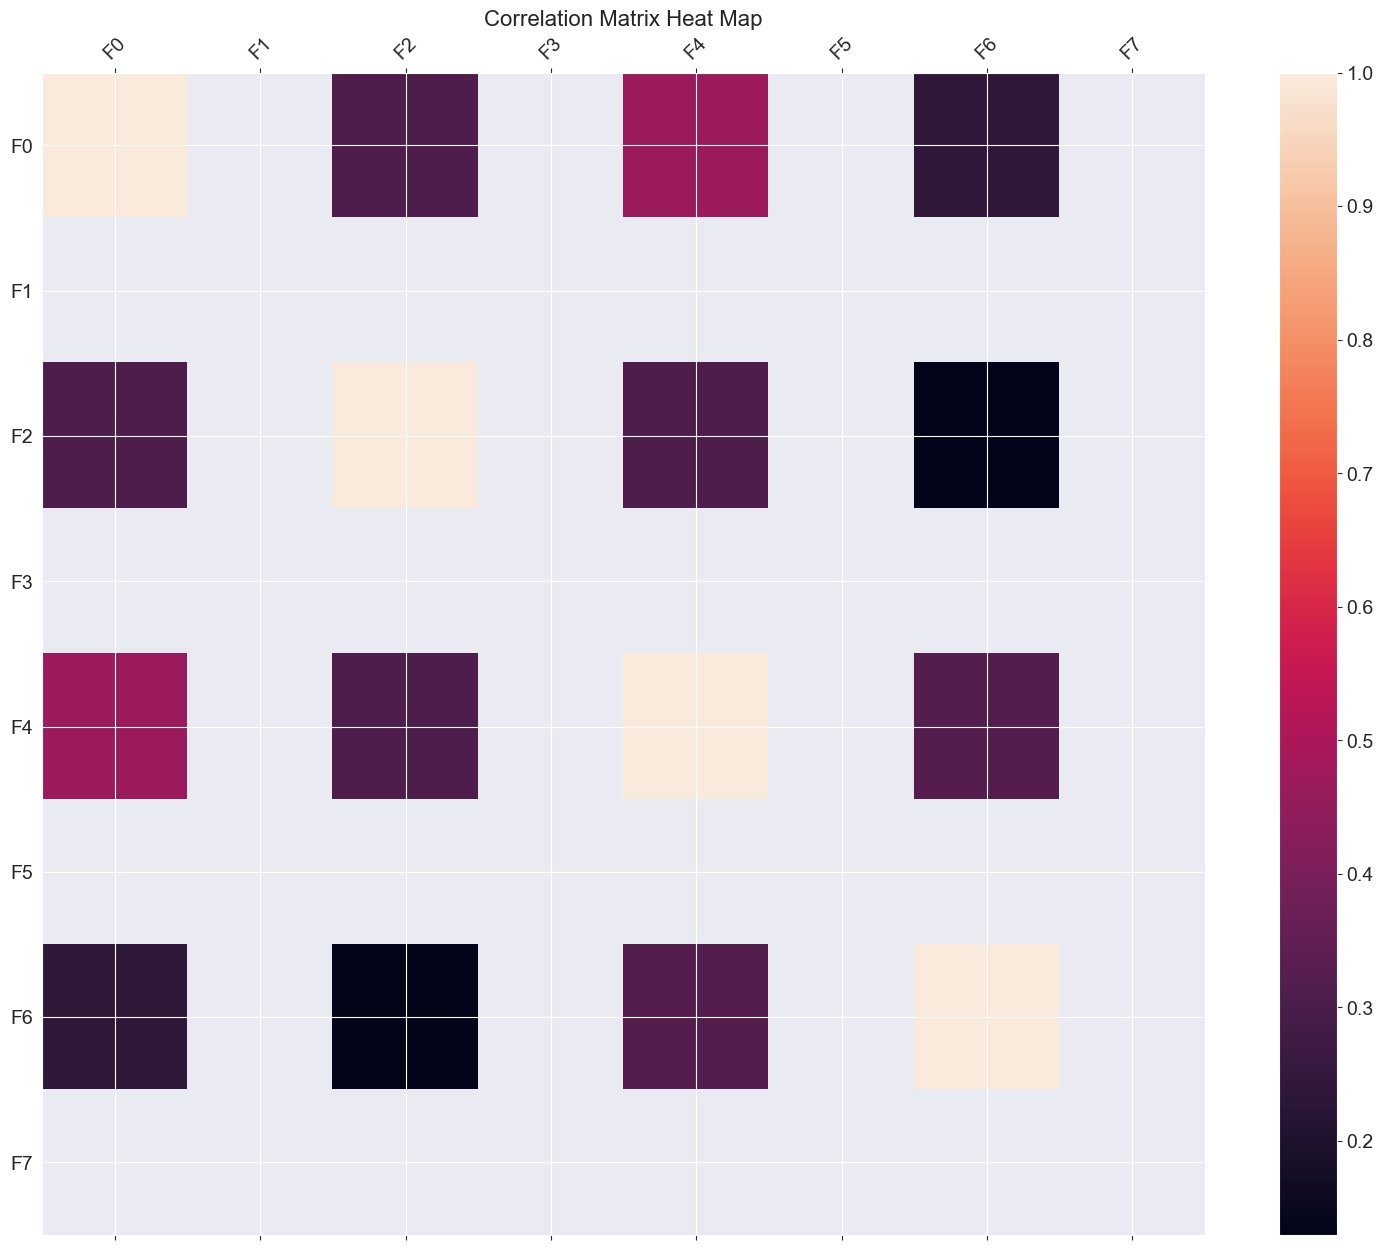

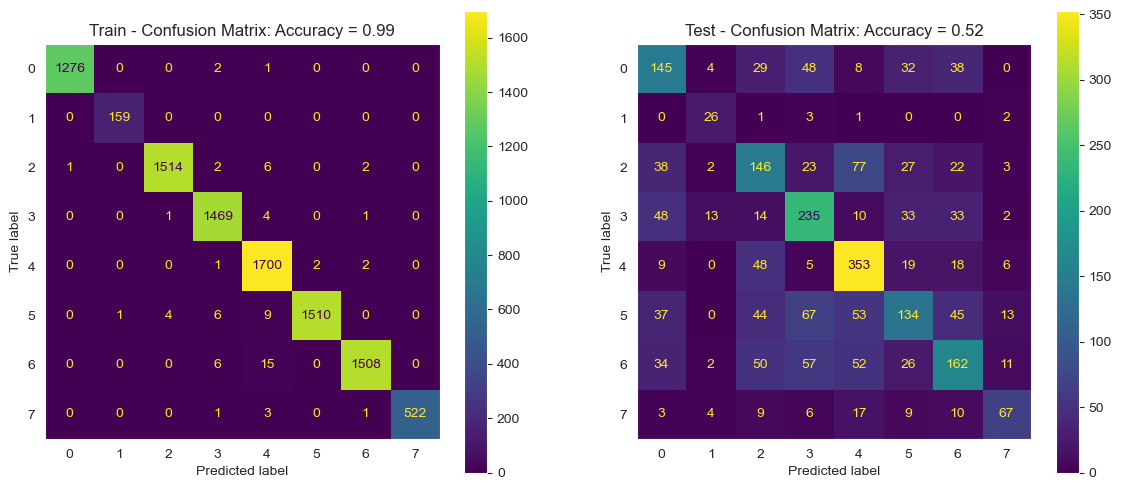

('              precision    recall  f1-score   support\n\n           0       0.46      0.48      0.47       304\n           1       0.51      0.79      0.62        33\n           2       0.43      0.43      0.43       338\n           3       0.53      0.61      0.56       388\n           4       0.62      0.77      0.69       458\n           5       0.48      0.34      0.40       393\n           6       0.49      0.41      0.45       394\n           7       0.64      0.54      0.59       125\n\n    accuracy                           0.52      2433\n   macro avg       0.52      0.55      0.53      2433\nweighted avg       0.52      0.52      0.51      2433\n',
 0.521167283189478,
          F0  F1        F2  F3       F4  F5        F6  F7
 0  0.503111 NaN  0.435837 NaN  0.52324 NaN  0.422641 NaN,
 array([0.19724111, 0.12034752, 0.10907446, 0.10460446, 0.11249186,
        0.11156127, 0.12110726, 0.12357207]))

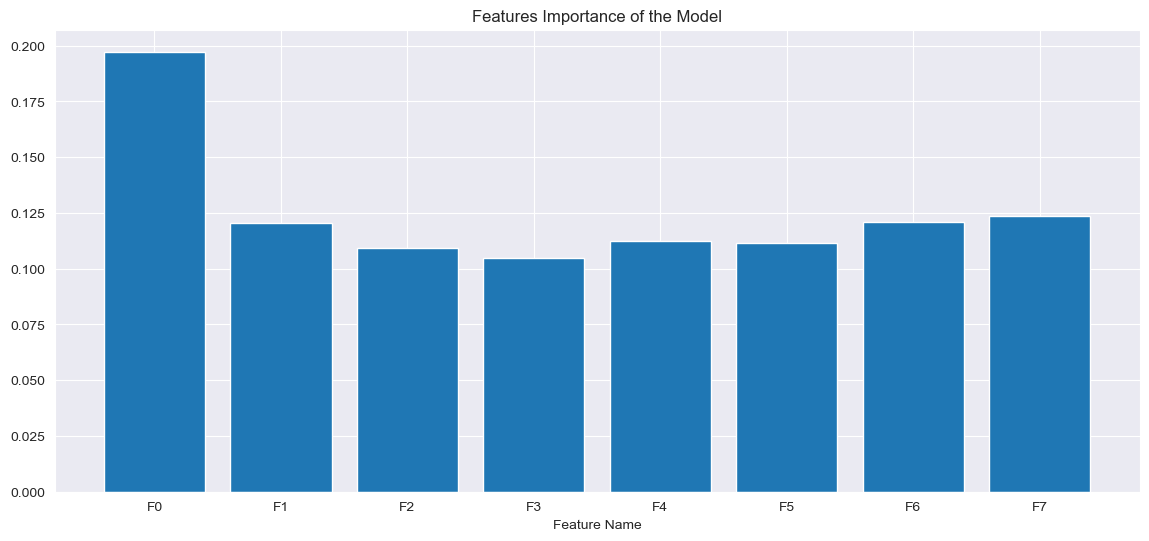

In [62]:
# Test SELECTED features with a model
TrainModelTestReport(train_data_selected_features,train_labels,test_data_selected_features,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=True)

In [11]:
def DataProcessing(frame_len,hop_len,N, plot):
    featured_data,labels = Preprocessing(frame_len,hop_len,N)
    train_data,train_labels,test_data,test_labels = SplitData(featured_data,labels,trainRatio=0.8,plot=plot)

    # Test features with a simple model
    report, score, corr_vec, feature_importance = TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=plot)
    return report, score, feature_importance, train_data,train_labels,test_data,test_labels

In [ ]:
report, score, feature_importance, train_data,train_labels,test_data,test_labels = DataProcessing(FRAME_LEN,HOP_LEN,N, plot=True)

In [10]:
def TestImportantFeatures(feature_importance,feature_importance_threshold,train_data,train_labels,test_data,test_labels):
    # Remove weak features
    weak_features_indexes = np.where(feature_importance < feature_importance_threshold)[0]
    train_data = np.delete(train_data,weak_features_indexes,axis=1)
    test_data = np.delete(test_data,weak_features_indexes,axis=1)
    display(train_data.shape[1])

    # Test  again after removing not important features
    TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1)

In [ ]:
TestImportantFeatures(feature_importance,0.06,train_data,train_labels,test_data,test_labels)

## Search for best Classifier (with different hyperparameters)